In [ ]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import pandas as pd
from sklearn.manifold import Isomap
from PIL import Image
import torch

from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Mar 17 01:36:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
path='/path/to/uthealth_data/31604/anat/'

loc1='pdw_2d_ax.nii.gz'#'dual_2d_ax.nii.gz'
dualx = nib.load(path+loc1)
dual = dualx.get_fdata().T

loc1='t2w_2d_ax.nii.gz'#'dual_2d_ax_e1.nii.gz'
dualx = nib.load(path+loc1)
duale = dualx.get_fdata().T

loc2='flair_2d_ax.nii.gz'
flairx = nib.load(path+loc2)
flair = flairx.get_fdata().T

loc3='t1w_3d_ax.nii.gz'#'t1w_2d_ax.nii.gz'
t1x = nib.load(path+loc3)
t1 = t1x.get_fdata().T

loc4='t1w_2d_ax_pre.nii.gz'
prex = nib.load(path+loc4)
pre = prex.get_fdata().T

loc5='t1w_2d_ax_post.nii.gz'
postx = nib.load(path+loc5)
post = postx.get_fdata().T

print(dual.shape,flair.shape,t1.shape,pre.shape,post.shape)

allx=[];
allx.append(dual)
allx.append(duale)
allx.append(flair)
#allx.append(t1)
allx.append(pre)
allx.append(post)
#all_og=np.array(allx)
#all_og.shape
data_og=allx
len(data_og)


(44, 512, 512) (44, 256, 256) (120, 256, 256) (44, 256, 256) (44, 256, 256)


5

In [ ]:
# choose image frame you want to analyze
slice_index=25
middle = slice_index

(<matplotlib.image.AxesImage at 0x7fbae85a23a0>, Text(0.5, 1.0, 'T1-post'))

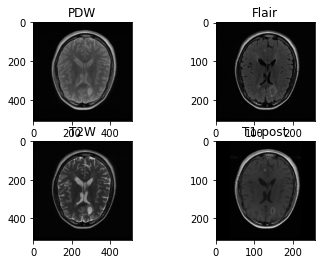

In [ ]:
pdw=dual
t2w=duale
import matplotlib.pyplot as plt

plt.subplot(2,2,1)
plt.imshow(pdw[slice_index],cmap='gray'), plt.title('PDW')
plt.subplot(2,2,2)
plt.imshow(flair[slice_index],cmap='gray'), plt.title('Flair')
plt.subplot(2,2,3)
plt.imshow(t2w[slice_index],cmap='gray'), plt.title('T2W')
plt.subplot(2,2,4)
plt.imshow(post[slice_index],cmap='gray'), plt.title('T1-post')

In [ ]:
import cv2

M,n,k=dual.shape
#M=10

scale_percent = 50 # percent of original size
width = int(n * scale_percent / 100)
height = int(k * scale_percent / 100)
dim = (width, height)
print(dim)

imx=[];
for m in range(M):
    resized = cv2.resize(pdw[m], dim, interpolation = cv2.INTER_CUBIC)
    imx.append(resized)

pdw2=np.array(imx)

imx=[];
for m in range(M):
    resized = cv2.resize(t2w[m], dim, interpolation = cv2.INTER_LANCZOS4)
    imx.append(resized)

t2w2=np.array(imx)

imx=[];
for m in range(M):
    resized = cv2.resize(flair[m], dim, interpolation = cv2.INTER_LANCZOS4)
    imx.append(resized)

flair2=np.array(imx)

imx=[];
for m in range(M):
    resized = cv2.resize(t1[m], dim, interpolation = cv2.INTER_LANCZOS4)
    imx.append(resized)

t1w2=np.array(imx)

imx=[];
for m in range(M):
    resized = cv2.resize(pre[m], dim, interpolation = cv2.INTER_LANCZOS4)
    imx.append(resized)

pre2=np.array(imx)

imx=[];
for m in range(M):
    resized = cv2.resize(post[m], dim, interpolation = cv2.INTER_LANCZOS4)
    imx.append(resized)

post2=np.array(imx)

allx=[];
allx.append(pdw2)
allx.append(t2w2)
allx.append(flair2)
#allx.append(t1w2)
allx.append(pre2)
allx.append(post2)
all=np.array(allx)
all.shape

(256, 256)


(5, 44, 256, 256)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
DR_components=2
which_modality=[0,1,2,3] # pdw,flair,t2,pre
M=len(which_modality)
data=all[which_modality,middle,:,:]
m,n,k=data.shape

print(f"Running isomap model on slice {middle}...")
vec=data.reshape((M,n*k)).T
#xx2=xx.reshape((M,n,k))
print(np.shape(data))
print(np.shape(vec))

model = Isomap(n_components=DR_components,n_neighbors=30)
model = model
proj = model.fit_transform(vec)
# print(proj.shape)
# proj1=proj.T
# data_fused=proj1.reshape((DR_components,n,k))
# print(np.shape(data_fused))


# data_fused_resized=[]
# data_fused_resized.append (cv2.resize(data_fused[0], [n,k], interpolation = cv2.INTER_LANCZOS4))
# print(np.shape(data_fused_resized))    
# data_fused_resized.append ( cv2.resize(data_fused[1], [n,k], interpolation = cv2.INTER_LANCZOS4))
# print(np.shape(data_fused_resized)) 

# plt.imshow(data_fused_resized[0], cmap='jet')

Running isomap model on slice 25...
(4, 256, 256)
(65536, 4)


TypeError: ignored

In [ ]:
from scipy import ndimage
import scipy.ndimage.morphology as morpho
"""Function for removing small objects and filling holes"""
def remove_small_objects(im,small_object_size_threshold,max_dilat):
    # detect image objects
    sz_big=10000
    sz_small=small_object_size_threshold
    dfac = int( max_dilat*(1-min(1,(max(0,sz_small)/sz_big))) )
    labeled, nr_objects = ndimage.label(im)
    result = labeled*0
    for obj_id in range(1, nr_objects+1):
        # creates a binary image with the current object
        obj_img = (labeled==obj_id)
        # computes object's area
        area = np.sum(obj_img)
        if area>small_object_size_threshold:
            if max_dilat>0:
                # dilatation factor inversely proportional to area
                dfac = int( max_dilat*(1-min(1,(max(0,area-sz_small)/sz_big))) )  
                print(dfac)  
            # dilates object
                dilat = morpho.binary_dilation(obj_img, iterations=dfac)
            else:
                dilat =obj_img
            result += dilat#obj_img
            plt.imshow(result)
            #result=np.logical_or(result,obj_img)
    return(result)

In [ ]:
# get binary images for all clusters/ccolors
img = data_fused_resized[0]
hist, bin_edges = np.histogram(img, bins=10)
bx=[]
bx.append(img<=bin_edges[0])
for ii in range(1, len(bin_edges)-1):
    temp=np.logical_and(img>bin_edges[ii],img<=bin_edges[ii+1])
    if np.sum(temp)!=0 and np.sum(temp)!=(m*n):
        bx.append(temp)
bx.append(img>=bin_edges[len(bin_edges)-1])
len(bx)

In [ ]:
"""Create Figures """
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 8
columns = 8

for count in range(len(bx)):
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, count+1)
  # showing image
  x = bx[count]
  plt.imshow(x)
  plt.axis('off')

In [ ]:
plt.imshow(bx[5])

In [ ]:
Image.fromarray(bx[5]).save('/content/MyDrive/MyDrive/BravermanLab/MS_Project/uthealth_data/25pred.png')

In [ ]:
img = cv2.imread('/content/MyDrive/MyDrive/BravermanLab/MS_Project/uthealth_data/25pred.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)>0
img.shape

mask_path = '/content/MyDrive/MyDrive/BravermanLab/MS_Project/uthealth_data/31604/masks/'
mask = cv2.imread(os.path.join(mask_path, "26mask.png"))
mask = cv2.resize(mask, dim, interpolation= cv2.INTER_LANCZOS4)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)>0

In [ ]:
img2 = remove_small_objects(img>0,2, 1.2)
plt.imshow(img2, cmap='gray')
plt.figure()
mask2 = remove_small_objects(mask>0,2, 1.2)
plt.imshow(mask2, cmap='gray')

In [ ]:
"""Function for calculating the dice similarity coefficient of FCM predictions"""
def dice_coefficient(predicted, target):
    smooth = 0
    #product = np.matmul(predicted, target)
    product = predicted*target
    intersection = product.sum()
    coef = (2*intersection + smooth) / (predicted.sum() + target.sum() + smooth) 
    return coef



In [ ]:
np.round(1000*dice_coefficient(mask.flatten()>0, img.flatten()>0))/1000


In [ ]:
np.round(1000*dice_coefficient(mask2.flatten()>0, img2.flatten()>0))/1000
